In [1]:
import os
import sys
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Demographical Analysis
* Studying columns and rows

In [2]:
df = pd.read_excel('../cleaned_student_data.xlsx')
df.head()

,indique su edad,indique el género con el cual se identifica,indique el tipo de establecimiento educacional de procedenci,indique el rango de su puntaje obtenido en la prueba de sele,indique el rango en el que se ubica el promedio de sus notas,puedo comprender en profundidad el contenido de los cursos d,puedo manejar los contenidos incluso en los cursos más avanz,puedo hacer un excelente trabajo resolviendo problemas y en,"comparado con otros estudiantes, ¿cuán bien esperas que te v","del 1 al 5, en una escala de mal a mejor, ¿cómo crees que se",...,el (la) profesor(a) ofreció nuevas ideas y perspectivas acer,disfruté siendo un(a) estudiante de este curso,este curso cumplió mis expectativas,adquirí herramientas para el desarrollo de mis habilidades,estoy satisfecho(a) con la educación recibida en este curso,logré los resultados de aprendizaje del curso,la carga de este curso fue muy alta,este curso fue muy complejo,este es/fue un curso muy relevante para mi formación,"mi nota final del curso, ¿en qué cuartil se encontrará o se"
0,24,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,5 y 7,0",4,5,4,Mejor,5,...,4,4,4,5,5,4,1,2,5,Dentro de las más altas del curso.
1,23,Femenino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",3,3,3,Peor,3,...,4,3,4,4,4,4,4,3,4,En el promedio.
2,25,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",4,5,4,Mejor,5,...,5,5,4,5,5,5,2,2,5,En el promedio.
3,23,Masculino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",4,3,4,Peor,4,...,4,5,5,5,5,5,3,3,3,En el promedio.
4,20,Femenino,Subvencionado,Entre 551 y 600,"Entre 6,0 y 6,4",5,4,5,Mejor,4,...,0,0,0,0,0,0,0,0,0,NaN


## Outlier
* It is evident that there is an outlier due to a bad enter of data

<AxesSubplot:ylabel='indique su edad'>

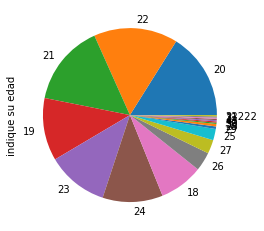

In [3]:
df[df.columns[0]].value_counts().plot.pie()

<AxesSubplot:>

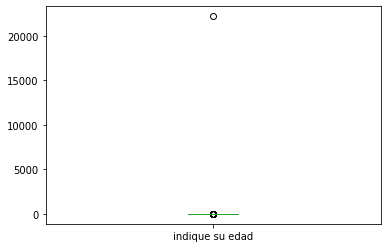

In [4]:
df[df.columns[0]].plot.box()

In [5]:
# Identifying outlier
location = np.where(df[df.columns[0]]>5000)[0]
df[df.columns[0]][location] 

# Replacing to 22 (probably the desired value)
df[df.columns[0]] = df[df.columns[0]].mask(df[df.columns[0]] >75, 22)

In [6]:
df[df.columns[0]][location]

398    22
Name: indique su edad, dtype: int64

## Analizying ages

<AxesSubplot:>

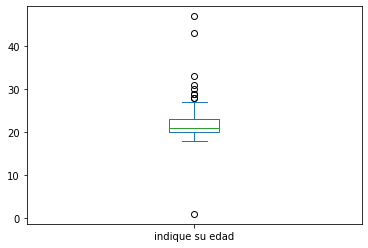

In [7]:
df[df.columns[0]].plot.box()

<AxesSubplot:ylabel='indique su edad'>

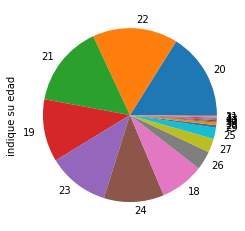

In [8]:
df[df.columns[0]].value_counts().plot.pie()

In [9]:
location = np.where(df[df.columns[0]]<10)[0]
df.loc[location] 

,indique su edad,indique el género con el cual se identifica,indique el tipo de establecimiento educacional de procedenci,indique el rango de su puntaje obtenido en la prueba de sele,indique el rango en el que se ubica el promedio de sus notas,puedo comprender en profundidad el contenido de los cursos d,puedo manejar los contenidos incluso en los cursos más avanz,puedo hacer un excelente trabajo resolviendo problemas y en,"comparado con otros estudiantes, ¿cuán bien esperas que te v","del 1 al 5, en una escala de mal a mejor, ¿cómo crees que se",...,el (la) profesor(a) ofreció nuevas ideas y perspectivas acer,disfruté siendo un(a) estudiante de este curso,este curso cumplió mis expectativas,adquirí herramientas para el desarrollo de mis habilidades,estoy satisfecho(a) con la educación recibida en este curso,logré los resultados de aprendizaje del curso,la carga de este curso fue muy alta,este curso fue muy complejo,este es/fue un curso muy relevante para mi formación,"mi nota final del curso, ¿en qué cuartil se encontrará o se"
295,1,Masculino,Municipal,Bajo 500,"Menor a 4,0",2,5,1,Mejor,5,...,0,0,0,0,0,0,0,0,0,NaN


## Analyzing Gender

<AxesSubplot:ylabel='indique el género con el cual se identifica'>

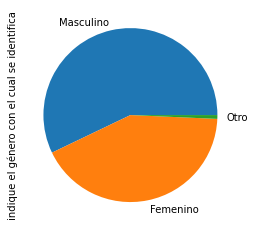

In [10]:
df[df.columns[1]].value_counts().plot.pie()

<AxesSubplot:ylabel='indique el tipo de establecimiento educacional de procedenci'>

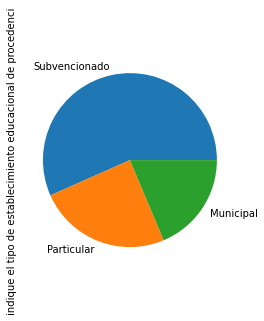

In [11]:
df[df.columns[2]].value_counts().plot.pie()

<AxesSubplot:ylabel='indique el rango de su puntaje obtenido en la prueba de sele'>

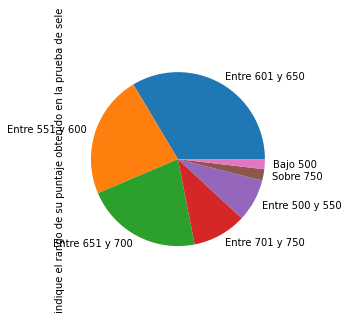

In [12]:
df[df.columns[3]].value_counts().plot.pie()

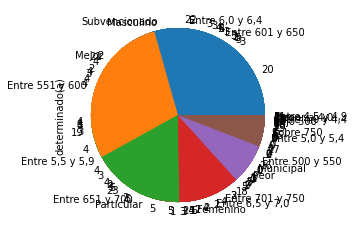

In [13]:
for col in df.columns[:20]:
    df[col].value_counts().plot.pie()

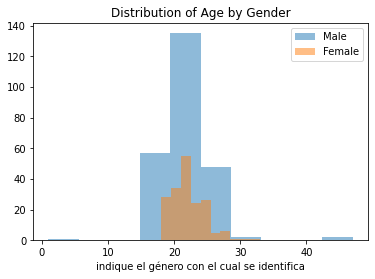

In [14]:
plt.hist(df.columns[0], data=df[df[df.columns[1]] == 'Masculino'], alpha=0.5, label='Male');
plt.hist(df.columns[0], data=df[df[df.columns[1]] == 'Femenino'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel(df.columns[1]);
plt.legend();

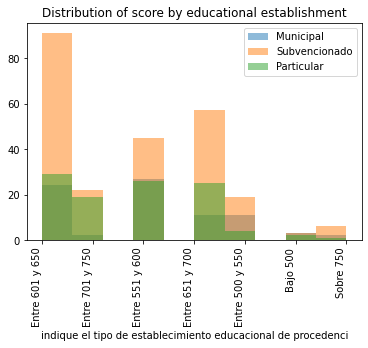

In [15]:
plt.hist(df.columns[3], data=df[df[df.columns[2]] == 'Municipal'], alpha=0.5, label='Municipal');
plt.hist(df.columns[3], data=df[df[df.columns[2]] == 'Subvencionado'], alpha=0.5, label='Subvencionado');
plt.hist(df.columns[3], data=df[df[df.columns[2]] == 'Particular'], alpha=0.5, label='Particular');
plt.title('Distribution of score by educational establishment');
plt.xlabel(df.columns[2]);
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.legend();

In [16]:
df_trimmed = df.iloc[:,[0,1,2,3,4,8]]

<AxesSubplot:>

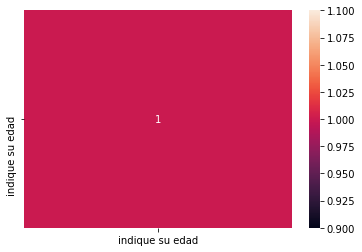

In [17]:
sns.heatmap(df_trimmed.corr(), annot=True)

## Return to excel

In [18]:
import os
module_path = os.path.abspath(os.path.join('..'))
if not os.path.isfile(module_path + '/tunned_student_data.xlsx'):
    df.to_excel(r'../tunned_student_data.xlsx', index = False)